# Logistic Regression with a Neural Network mindset

Welcome to your programming project! In this project, you will construct a logistic regression classifier to identify chess pieces on a board. This project will help you understand the methodology behind machine learning.


## What is Logistic Regression?
Logistic Regression, often considered one of the simplest forms of classification algorithms, is a fundamental technique used for binary classification problems – tasks where we aim to categorize entities into one of two distinct groups. In this project, we’ll be using logistic regression to classify images of individual chessboard squares as either ‘occupied’ by a chess piece or ‘empty’.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

## Project Overview
**In this project, you will:**

- Explore a Real Dataset: Work with a dataset containing images of chessboard squares. This real-world dataset will provide a practical scenario for applying logistic regression.
- Implement Logistic Regression: Step by step, you’ll implement logistic regression from scratch. This hands-on approach is designed to deepen your understanding of the algorithm and its components.
- Draw Connections to Neural Networks: As you progress, we’ll highlight how each step in logistic regression is a building block for neural networks.
- Analyze the Results: You will not only build the model but also learn how to evaluate its performance using various metrics – a vital skill in machine learning.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [275]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# function from local utility file
from lr_utils import load_dataset

%matplotlib inline

## 2 - Overview of the Problem Set ##

**Problem Statement**: You have been provided with a dataset (located in the `datasets` folder) containing H5 files. H5 files are a file format specifically designed for storing and managing large amounts of data efficiently. They are often used in scientific computing contexts as they can accommodate complex data structures and support data compression. In this dataset, H5 files contain:

- **A training set** of `m_train` images, each labeled as either:
  - **Occupied by a chess piece (`y=1`)** 
  - **Empty (`y=0`)**

- **A test set** of `m_test` images, labeled in the same manner as the training set.

- **Image dimensions**: Each image is of shape `(num_px, num_px, 3)`, where `3` stands for the 3 channels (RGB) in each color image. Hence, every image is a square, with both height and width being `num_px`.

Your objective is to build a simple image-recognition algorithm that can accurately classify squares on a chessboard as either occupied by a chess piece or empty.


**Getting started with the dataset**: Begin by loading the dataset. You can do this by executing the code below:


In [276]:
# Loading the data 
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = load_dataset()

We append _orig to the names of our image datasets (train and test) to indicate that these are the original, unprocessed sets of data. As we progress through the project, we'll be applying various preprocessing steps to these images. Once preprocessing is complete, the transformed datasets will be referred to as train_set_x and test_set_x. It's important to note that our label datasets, train_set_y and test_set_y, do not require this preprocessing step.

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. The images contain all chess pieces on both color fields. The trainings set consists of a total of 1121 images. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = 1, it's an 'occupied' chessfield.


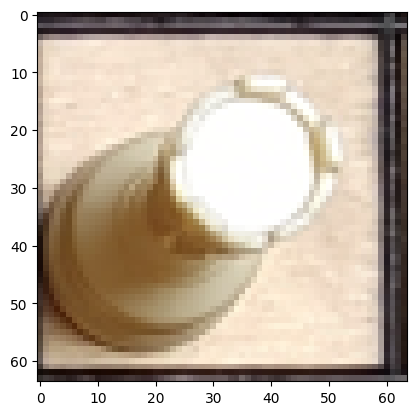

In [277]:
index = 1120
plt.imshow(train_set_x_orig[index])

# Check the value of y and assign the appropriate string
status = "empty" if train_set_y[0, index] == 0 else "occupied"

# Print the result
print("y = " + str(train_set_y[0, index]) + ", it's an '" + status + "' chessfield.")


Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
   - m_train (number of training examples)
   - m_test (number of test examples)
   - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]` which will acces the first dimension.

In [278]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 1121
Number of testing examples: m_test = 184
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (1121, 64, 64, 3)
train_set_y shape: (1, 1121)
test_set_x shape: (184, 64, 64, 3)
test_set_y shape: (1, 184)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 1121 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 184 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). Flattening the images is a crucial step in preparing our data for logistic regression. In their original form, each image is a 3D array (height, width, color channels), which logistic regression cannot directly handle. By flattening, we transform each image into a 1D array, essentially unrolling the pixel values into a long vector. This simplification allows us to feed the image into the logistic regression algorithm, which expects input data in a vector format. It also ensures that each pixel value in the image becomes a After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b $*$ c $*$ d , a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```
The -1 indicates, that this dimension will be calculated from the shape of the input matrix (only one -1 is possible).

In [279]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###
print ("train_set_x_orig shape: " + str(train_set_x_orig.T.shape))
print ("train_set_y_orig shape: " + str(test_set_x_orig.T.shape))
print ("---------------------------------------------------------")
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


train_set_x_orig shape: (3, 64, 64, 1121)
train_set_y_orig shape: (3, 64, 64, 184)
---------------------------------------------------------
train_set_x_flatten shape: (12288, 1121)
train_set_y shape: (1, 1121)
test_set_x_flatten shape: (12288, 184)
test_set_y shape: (1, 184)


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 1121)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 1121)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 184)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 184)</td> 
  </tr>
</table>

Comparing the shapes of the original sets and the flatten sets it becomes clear that number of examples stays the same. The dimensions decrease to two dimensions.

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [280]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='red'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_Example.jpg" style="width:650px;height:400px;">

Here the vector on the left represents every RGB values of the image, because we have flattened the images. These intensity values serve as the input features for the logistic regression model. Each feature is associated with a weight. The logistic regression model learns these weights during the training process. The goal is to find the weights that best differentiate between the two classes: occupied and empty chessboard squares.

The model computes a weighted sum of the input features, adding the bias term (b) to this sum.
This result is then passed through a sigmoid function σ. The sigmoid function takes the linear combination of weights and features and maps it to a probability value between 0 and 1. This probability is indicative of the model's confidence in whether the chessboard square is occupied or not.

In this specific case, the output probability (0.73 in the example) suggests that the model is confident that the field is occupied. This is because the probability is higher than the typical threshold of 0.5 used for binary classification. If the output probability were below 0.5, the model would predict that the field is likely empty.

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
   - Initialize the parameters of the model
   - Learn the parameters for the model by minimizing the cost  
   - Use the learned parameters to make predictions (on the test set)
   - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [281]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [282]:
print ("sigmoid([-5, 0, 4]) = " + str(sigmoid(np.array([-5, 0, 4]))))

sigmoid([-5, 0, 4]) = [0.00669285 0.5        0.98201379]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([-5, 0, 4])**</td>
    <td> [0.00669285    0.5         0.98201379]</td> 
  </tr>
</table>

### 4.2 - Initializing parameters

In machine learning algorithms, particularly those that are iterative in nature like logistic regression, initializing parameters is a necessary step before the learning process begins. Parameters, in this case the weights (w) and bias (b), are the values that the model will adjust to fit the data.

Initializing the weight vector w to zeros is a simple and commonly used strategy. It provides a starting point for the algorithm to start learning. The bias term b is typically initialized to zero as well.

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [283]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    Initializes a weight vector and bias term to zeros.
    
    Parameter:
    dim -- the number of features or parameters
    
    Returns:
    w -- a weight vector of zeros with shape (dim, 1)
    b -- a bias term initialized to 0
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w, b = np.zeros((dim, 1)), 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [284]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [285]:
# GRADED FUNCTION: propagate
def propagate(w, b, X, Y):
    """
    Calculate the logistic regression cost and its gradients using the propagation as described.

    Parameters:
    w -- weights, a numpy vector with dimensions (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- image data of shape (num_px * num_px * 3, number of samples)
    Y -- true "label" vector (0 for an empty field, 1 for an occupied field) with dimensions (1, number of samples)

    Returns:
    cost -- the computed cost for logistic regression using negative log-likelihood
    dw -- the gradient of the cost with respect to the weights, has the same shape as w
    db -- the gradient of the cost with respect to the bias, a scalar
    """
        
    # FORWARD AND BACKWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 6 lines of code)
    z = np.dot(w.T, X) + b
    a = sigmoid(z)
    cost = -1/X.shape[1] * np.sum(Y * np.log(a) + (1 - Y) * np.log(1 - a))
    dz = a - Y
    dw = 1/X.shape[1] * np.dot(X, dz.T)
    db = 1/X.shape[1] * np.sum(dz)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    assert(np.isscalar(cost))
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [286]:
w, b, X, Y = np.array([[0.5],[1.]]), 3., np.array([[1.2,1.8,-1.6],[1.3,3.5,-0.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.46025175]
 [0.4373645 ]]
db = 0.290931552424722
cost = 1.678319357071308


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[0.46025175]
     [0.4373645 ]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.290931552424722 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 1.678319357071308 </td>
    </tr>

</table>

### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [287]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Parameters:
    w -- weights, a numpy vector with dimensions (num_px * num_px * 3, 1)
    b -- bias, a single number
    X -- matrix of features, shaped (num_px * num_px * 3, number of samples)
    Y -- vector of actual labels (0 for empty, 1 for occupied), sized (1, number of samples)
    num_iterations -- how many iterations to run the optimization loop
    learning_rate -- the rate at which the model learns, influences parameter updates
    print_cost -- if set to True, prints the calculated cost at every 100 iterations
    
    Returns:
    params -- dictionary with updated weights w and bias b
    grads -- dictionary with the gradients of the weights and bias with respect to the cost function
    costs -- list of costs computed during optimization, recorded every 100 iterations, useful for plotting the learning curve.

    Tips:
    The main steps involve:
        1) Computing the cost and its gradient at the current parameter values.
        2) Applying the gradient descent update rule to modify w and b.
    """
    costs = []
    
    ### START CODE HERE ### (≈ 11 lines of code)
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w -= learning_rate*dw
        b -= learning_rate*db
        if(i % 99 == 0):
            costs.append(cost)
            if(print_cost):
                print("cost is: " + str(cost))
    ### END CODE HERE ###

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [288]:
params, grads, costs = optimize(w, b, X, Y, num_iterations = 750, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

cost is: 1.678319357071308
cost is: 1.441106096055766
cost is: 1.2148735999875389
cost is: 1.0083707677499505
cost is: 0.8399060279289882
cost is: 0.729182063845233
cost is: 0.6715570207478901
cost is: 0.6418183622886431
w = [[-0.73026143]
 [-0.00298337]]
b = 2.0868580518713187
dw = [[ 0.1370139 ]
 [-0.03481397]]
db = 0.13828942049129783


**Expected Output**:
 
w = [[-0.73026143]
 [-0.00298337]]

b = 2.0868580518713187

dw = [[ 0.1370139 ]
 [-0.03481397]]
 
db = 0.13828942049129783

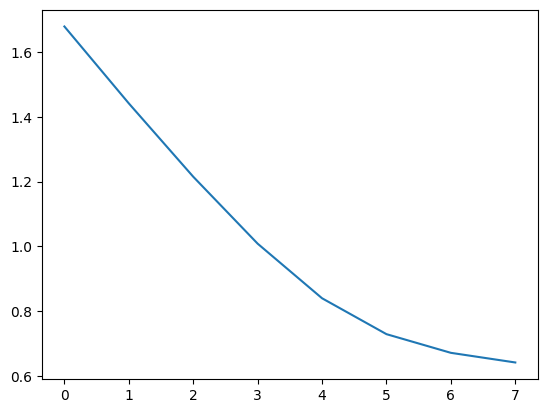

In [289]:
import matplotlib.pyplot as plt
plt.plot(costs)

### Predict ###

In the context of logistic regression, prediction is about determining the label of new data points based on the learned parameters (weights and bias). The predict function does exactly that.

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [290]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict the labels for a given dataset X using the logistic regression parameters w and b.
    
    Parameters:
    w -- weights, a numpy array with dimensions (num_px * num_px * 3, 1)
    b -- bias, a single number
    X -- dataset of flattened images, where each column corresponds to a single example
    
    Returns:
    Y_prediction -- a numpy array containing the predicted labels for each example in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)    # make sure w has the right dimensions
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    
    ### START CODE HERE ### (≈ 2+ lines of code)
    Y_prediction = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = (Y_prediction > 0.5).astype(float)
    
    ### END CODE HERE ###

    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [291]:
w = np.array([[0.3946109],[0.14099536]])
b = -0.4
X = np.array([[2.,-1.4,-2.1],[2.9,2.3,0.2]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 0. 0.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  0.  0.]]
         </td>  
   </tr>

</table>


<font color='red'>
**What to remember:**
You've implemented several functions that:

- Initialize (w,b)

- Optimize the loss iteratively to learn parameters (w,b):

    - computing the cost and its gradient 
    
    - updating the parameters using gradient descent

- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:

    - Y_prediction_test for your predictions on the test set

    - Y_prediction_train for your predictions on the train set
    
    - w, costs, grads for the outputs of optimize()

In [292]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Construct the logistic regression model using defined functions.
    
    Parameters:
    X_train -- input features for the training set, numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- true labels for the training set, numpy array of shape (1, m_train)
    X_test -- input features for the test set, numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- true labels for the test set, numpy array of shape (1, m_test)
    num_iterations -- number of iterations for the optimization loop
    learning_rate -- step size for updating the weights in each iteration
    print_cost -- if True, the function prints the cost every 100
    
    Returns:
    d -- dictionary containing weights, bias, information on the learning rate, number of iterations, and training and test predictions.        
    """
    
    ### START CODE HERE ###
    
    # initialize w and b
    w, b = initialize_with_zeros(X_train.shape[0])

    #optimize w and b
    params, grad, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w_trained = params["w"]
    b_trained = params["b"]

    #estimate prediction of train and test set
    Y_prediction_test = predict(w_trained, b_trained, X_test)
    Y_prediction_train = predict(w_trained, b_trained, X_train)
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [293]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)


train accuracy: 96.96699375557537 %
test accuracy: 64.13043478260869 %


**Expected Output**: 

train accuracy: 96.96699375557537 %

test accuracy: 64.13043478260869 %

**Comment**: The training accuracy of our model has reached 97%. This indicates that our model has a strong ability to fit the data it has been trained on. An accuracy this high suggests that the model has sufficient complexity to capture the underlying patterns in the training set. However, achieving near-perfect training accuracy can sometimes be a warning sign of overfitting, where the model learns the training data too well, including noise and outliers.

On the other hand, the test accuracy stands at 64%. Although this might seem low compared to the training accuracy, it's relatively common for simpler models like logistic regression, which are linear classifiers, to have a lower performance on the test set. This discrepancy further points

towards overfitting since it indicates the model does not generalize as well on unseen data. The test accuracy is a more genuine measure of how the model will perform in real-world scenarios or when it encounters data that it wasn't trained on.

The drop from 97% accuracy on the training set to 64% on the test set is a clear indicator that the model has learned specific features of the training data which do not apply to the broader set of data in the field. There are methods, such as regularization, which helps to create a model that generalizes better by penalizing overly complex models. These techniques will aim to narrow the gap between training and test performance, ensuring that our model not only learns well but also applies that learning effectively to new data.

Let's also plot the cost function and the gradients.

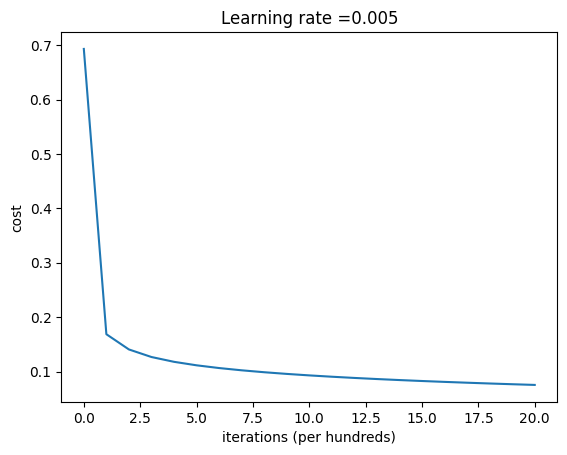

In [294]:
# Plot learning curve (with costs)
costs = d['costs']
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## 6 - Further analysis ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates in combination with number of iterations. Run the cell below. This can take about 1-2 minutes. Feel free also to try different values for the learning_rates array and the num_iterations array. It will calculate every combination with the values of the arrays.

learning rate is: 0.01 and number of iterations is: 250
train accuracy: 95.53969669937555 %
test accuracy: 64.13043478260869 %

-------------------------------------------------------

learning rate is: 0.001 and number of iterations is: 250
train accuracy: 94.29081177520071 %
test accuracy: 65.21739130434783 %

-------------------------------------------------------

learning rate is: 0.0001 and number of iterations is: 250
train accuracy: 94.29081177520071 %
test accuracy: 65.21739130434783 %

-------------------------------------------------------

learning rate is: 0.01 and number of iterations is: 500
train accuracy: 96.25334522747546 %
test accuracy: 64.13043478260869 %

-------------------------------------------------------

learning rate is: 0.001 and number of iterations is: 500
train accuracy: 94.11239964317573 %
test accuracy: 65.21739130434783 %

-------------------------------------------------------

learning rate is: 0.0001 and number of iterations is: 500
train accurac

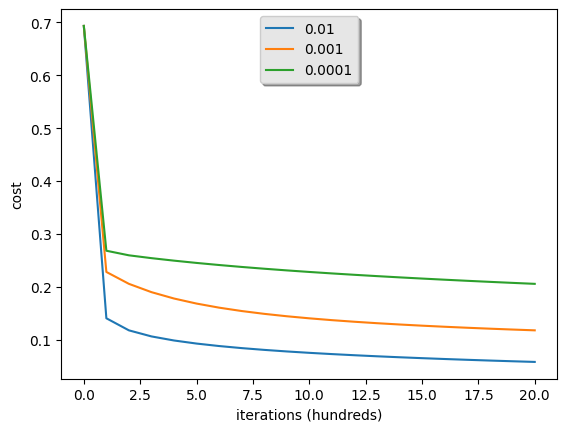

In [295]:
learning_rates = [0.01, 0.001, 0.0001]
num_iterations = [250, 500, 2000]
models = {}
for s in num_iterations:
    for i in learning_rates:
        print ("learning rate is: " + str(i) + " and number of iterations is: " +str(s))
        models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = s, learning_rate = i, print_cost = False)
        print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
    plt.plot(models[str(i)]["costs"], label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- The learning rates and the number of iterations are critical hyperparameters that significantly impact the performance and outcome of our model. This experiment shows how different combinations of these parameters can lead to varying costs and, consequently, different prediction results.
- A high learning rate may cause the cost to fluctuate intensely or even diverge, as the steps taken in the gradient descent are too large and miss the minimum of the cost function.
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 


<font color='red'>
**What to remember from this assignment:**

1. Preprocessing the dataset is important.

2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().

3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!